<a href="https://colab.research.google.com/github/blaim/2025-1-vision/blob/main/HW2/HW2-10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Fig0943(a)(dark_blobs_on_light_background).tif to Fig0943(a)(dark_blobs_on_light_background) (14).tif


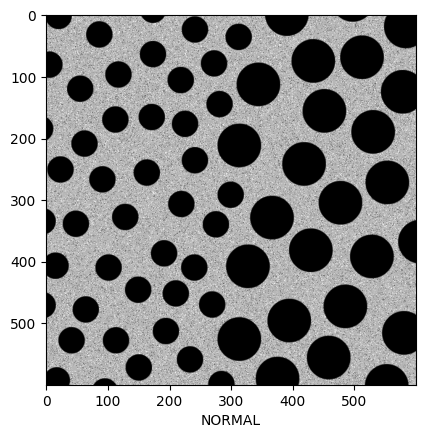

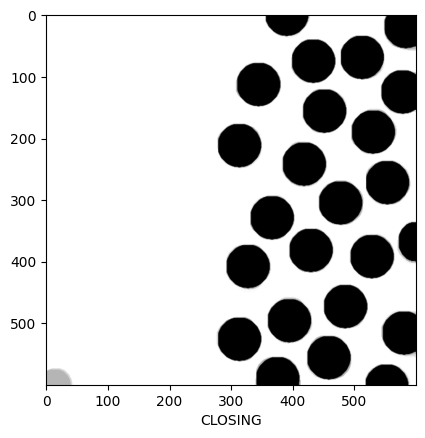

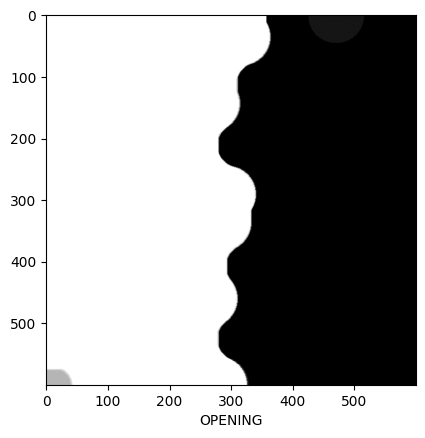

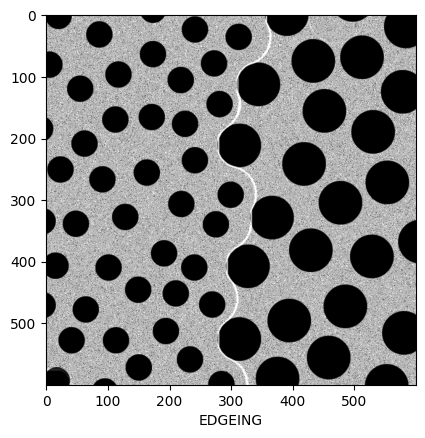

In [15]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt


# 이미지 업로드(코랩 이미지 업로드 기능 이용)
uploaded = files.upload()

filename = list(uploaded.keys())[0]

image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

#작은 얼룩보다 약간 크게 커널 크기 조정, 원형커널로 생성
se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (50, 50))

############
##작은 점 제거
################
#closing 연산()
closed = cv2.morphologyEx(image, cv2.MORPH_CLOSE, se, iterations=1)


###########
##얼룩들간 패치 제거
#########
#얼룩 간격보다 큰 구조요소로 열림연산 수행하여 다 붙게 만들기
se2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (90, 90))
#opening 연산()
opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, se2, iterations=1)



#######
#경계선 구하기
######
#morphological gradeint 이용하여 경계선 구하기 (팽창 - 침식)
#경계구하니까 작은 se사용
se = np.uint8([
    [0,1,0],
    [1,1,1],
    [0,1,0]
])

#c에서 경계값만 추출
morphological = cv2.morphologyEx(opened, cv2.MORPH_GRADIENT, se)

#기본 이미지에 경계선 이미지 더하기
lined = cv2.add(image, morphological)

#opening연산
#eroded = cv2.erode(image, se, iterations=1)
#opening = cv2.dilate(eroded, se, iterations=1)

#기본이미지 출력
plt.imshow(image,cmap='gray')
plt.xlabel('NORMAL')
plt.show()

#작은 점 제거한것 출력
plt.imshow(closed,cmap='gray')
plt.xlabel('CLOSING')
plt.show()

#전체 요소 붙도록 출력
plt.imshow(opened,cmap='gray')
plt.xlabel('OPENING')
plt.show()

#경계선 그린것 출력
plt.imshow(lined,cmap='grey')
plt.xlabel('EDGEING')
plt.show()



In [ ]:
#